In [1]:
"""PARAMETERS TO CAPTURE ON STDIN VIA PAPERMILL...."""
#config_path = 'configs/species_experiments/Escherichia_coli_lysate.yaml'
#config_path = 'configs/global_loss_composed_globalAvgtm/global_allmeltome.yaml'
#config_path = 'configs/global_loss_composed_globalAvgtm/global_allmeltome_cleaned.yaml'
#config_path = 'configs/species_experiments_loss_composed_globalAvgtm_cleanup/loss2/Arabidopsis_thaliana_seedling_lysate.yaml'
#config_path = "configs/species_experiments_loss_composed_globalAvgtm/loss2/Geobacillus_stearothermophilus_NCA26_lysate.yaml"

#config_path = "configs/tmp/Arabidopsis_thaliana_seedling_lysate_rankn.yaml"
#config_path = "configs/tmp/Arabidopsis_thaliana_seedling_lysate_rankn_l2_l1_MSE.yaml"
#config_path = "configs/tmp/Arabidopsis_thaliana_seedling_lysate_rankn_l2_l1_MSE_5_percent.yaml"
#config_path = "configs/tmp/Arabidopsis_thaliana_seedling_lysate_rankn_l2_l1_MSE_normal_noise_persample.yaml"
#config_path = "configs/tmp/Arabidopsis_thaliana_seedling_lysate_rankn_l2_l1_MSE_normal_noise_persample_diagonal.yaml"


#config_path = "configs/tmp/Arabidopsis_thaliana_seedling_lysate_rankn_tmp.yaml"
#config_path = "configs/tmp/Arabidopsis_thaliana_seedling_lysate_Bias_Global.yaml"
#config_path = "configs/tmp/Arabidopsis_thaliana_seedling_lysate_Bias_batch.yaml"
#config_path = "configs/tmp/Arabidopsis_thaliana_seedling_lysate_MSE.yaml"
#config_path = "configs/tmp/Arabidopsis_thaliana_seedling_lysate_Balancing_Samples.yaml"
#config_path = 'configs/experiments_10_05_2024/global/global_allmeltome_biasg.yaml'
#config_path = 'configs/experiments_10_05_2024/species_specific/biasg/Caenorhabditis_elegans_lysate.yaml'
#config_path = 'configs/experiments_10_05_2024/global_vs_species/biasg/Caenorhabditis_elegans_lysate.yaml'
#config_path = 'configs/experiments_10_05_2024/global_vs_species/rankN/K562.yaml'
config_path = 'configs/experiments_10_05_2024/species_specific/balanceMSE/Saccharomyces_cerevisiae_lysate.yaml'

In [2]:
# Parameters
config_path = "configs/experiments_10_05_2024/global_vs_species/balanceMSE/HaCaT.yaml"


In [3]:
import yaml

print(f"the value of path captured is: {config_path}")

with open(config_path, 'r') as file:
    config = yaml.safe_load(file)
    
#print(config)
#print(f"the value of path captured is: {config_path}")

the value of path captured is: configs/experiments_10_05_2024/global_vs_species/balanceMSE/HaCaT.yaml


In [4]:
#import ipdb; ipdb.set_trace()

path_progresESM    = config['initial_paths']['path_progresESM']
checkpoint_pathESM = config['initial_paths']['checkpoint_pathESM']

path_progresPiFold    = config['initial_paths']['path_progresPiFold']
checkpoint_pathPiFold = config['initial_paths']['checkpoint_pathPiFold']


path_progresMix= config['initial_paths']['path_progresMix']
#checkpoint_pathMix='../checkpoints/LA_MLP_TaskVectorBias_Merged_allnet_1_10_2023_finetunning_NoMLPincNoBN_lrx00001_lossmod/'
checkpoint_pathMix= config['initial_paths']['checkpoint_pathMix']

#import ipdb; ipdb.set_trace()

organism = config['organism']['organism']
keyword = config['organism']['keyword']

#ESM_source = 'esm2_embeddings'
ESM_source = config['initial_paths']['ESM_source']
PiFold_source = config['initial_paths']['PiFold_source']

prepro_train_emb_ESM = config['initial_paths']['prepro_train_emb_ESM']
prepro_test_emb_ESM  = config['initial_paths']['prepro_test_emb_ESM']
prepro_val_emb_ESM   = config['initial_paths']['prepro_val_emb_ESM']

prepro_train_emb_PiFold = config['initial_paths']['prepro_train_emb_PiFold']
prepro_test_emb_PiFold  = config['initial_paths']['prepro_test_emb_PiFold']
prepro_val_emb_PiFold   = config['initial_paths']['prepro_val_emb_PiFold']

In [5]:
import __init__

from src.utilities import train_test_validation_splits, \
                            prepare_train_test_val_seqs_by_batches, \
                            tensor2dataloader, load_full_meltome_FLIP_db, \
                            seek_UniprotID_association_Meltome_prots,\
                            download_UniprotID_Alphafold_Structures,\
                            get_guided_encoder_output,\
                            ESM2_IF_repr
                            
import pandas as pd
import numpy as np
    
import ipdb
path_meltome = config['meltome']['path_meltome']
complete_meltome_db = config['meltome']['complete_meltome_db']

full_meltome_db = load_full_meltome_FLIP_db(complete_meltome_db)

splits_meltome = pd.read_csv(path_meltome, sep=',')

#import ipdb; ipdb.set_trace()

splits_meltome = seek_UniprotID_association_Meltome_prots(splits_meltome, full_meltome_db)
split_meltome = splits_meltome[splits_meltome['sequence'].str.len()>= 50]
#import ipdb; ipdb.set_trace()
'''------------------------------------------------------------------------------------------------------------------------------'''
'''------------------------------------------------------------------------------------------------------------------------------'''
'''                      JUST FILTERING TO TAKE BACTERIA AND IGNORE EUKARIOTIC SAMPLES (HUMAN, PLANTS, CANCER CELLS, ETC)        '''

list_bacteria = [ "Caenorhabditis_elegans_lysate", "Saccharomyces_cerevisiae_lysate", "Escherichia_coli_lysate", 
                 "Escherichia_coli_cells", "Bacillus_subtilis_168_lysate_R1", "Oleispira_antarctica_RB-8_lysate_R1", 
                 "Picrophilus_torridus_DSM9790_lysate", "Thermus_thermophilus_HB27_cells", 
                 "Geobacillus_stearothermophilus_NCA26_lysate", "Thermus_thermophilus_HB27_lysate"]
#splits_meltome = splits_meltome[ splits_meltome.organism.isin( list_bacteria ) ]

'''------------------------------------------------------------------------------------------------------------------------------'''
'''------------------------------------------------------------------------------------------------------------------------------'''

train, val, test = train_test_validation_splits(splits_meltome)

print("Done")



Done


In [6]:
import torch
import src.IF_PiFold_embeddings  as PiFoldconf 
#from src.IF_PiFold_embeddings import PiFold_setup


args = PiFoldconf.get_parser()
exp = PiFoldconf.PiFold_setup(args)
svpath = config['Pifold_pretrain']['svpath']
exp.method.load_state_dict(torch.load(svpath+'checkpoint.pth'))


Use GPU: cuda:0



device: 	cuda	
display_step: 	10	
res_dir: 	results	
ex_name: 	ProDesign	
use_gpu: 	True	
gpu: 	0	
seed: 	111	
data_name: 	CATH	
data_root: 	data/	
batch_size: 	8	
num_workers: 	8	
method: 	ProDesign	
config_file: 	None	
hidden_dim: 	128	
node_features: 	128	
edge_features: 	128	
k_neighbors: 	30	
dropout: 	0.1	
num_encoder_layers: 	10	
epoch: 	100	
log_step: 	1	
lr: 	0.001	
patience: 	100	
updating_edges: 	4	
node_dist: 	1	
node_angle: 	1	
node_direct: 	1	
edge_dist: 	1	
edge_angle: 	1	
edge_direct: 	1	
virtual_num: 	3	


<All keys matched successfully>

In [7]:
from tqdm.auto import tqdm
import torch
from src.ESM2embeddings import ESM2embeddings
from src.ESM2_IF1_embeddings import ESM2_IF1_embeddings
from src.utilities import train_test_validation_splits, prepare_train_test_val_seqs_by_batches, tensor2dataloader,read_and_plot_loss_curves, cleanup_by_organism_and_correspondence_idx
from src.NeuralArchitectures import regressionHead

from src.AdaptiveDataset import AdaptiveDataset, Species_Balancing_BatchSampler

structuredir =  config['structures_path']['structuredir']
meltome_struct_dir_labels =  config['structures_path']['meltome_struct_dir_labels']

#import ipdb; ipdb.set_trace()
import os 
if not os.listdir(structuredir) and not os.path.isfile(meltome_struct_dir_labels+'Meltome_Splits_FLIPS_train.txt')\
                                and not os.path.isfile(meltome_struct_dir_labels+'Meltome_Splits_FLIPS_test.txt')\
                                and not os.path.isfile(meltome_struct_dir_labels+'Meltome_Splits_FLIPS_val.txt'): 
    
    print("Finding structures to proteins via Alphafold/PDB dbs..........") 
    
    download_UniprotID_Alphafold_Structures(train, structuredir, meltome_struct_dir_labels, 'Meltome_Splits_FLIPS_train')
    download_UniprotID_Alphafold_Structures(test, structuredir, meltome_struct_dir_labels, 'Meltome_Splits_FLIPS_test')
    download_UniprotID_Alphafold_Structures(val, structuredir, meltome_struct_dir_labels, 'Meltome_Splits_FLIPS_val')


#import ipdb; ipdb.set_trace()
Structinfo_Meltome_Splits_train = pd.read_csv( meltome_struct_dir_labels+'Meltome_Splits_FLIPS_train.txt', sep='\t').set_index(train.index)
Structinfo_Meltome_Splits_test = pd.read_csv( meltome_struct_dir_labels+'Meltome_Splits_FLIPS_test.txt', sep='\t').set_index(test.index)
Structinfo_Meltome_Splits_val = pd.read_csv( meltome_struct_dir_labels+'Meltome_Splits_FLIPS_val.txt', sep='\t').set_index(val.index)


#import ipdb; ipdb.set_trace()

train = pd.concat([train, Structinfo_Meltome_Splits_train], axis=1).query('Source=="alphafold"')
test = pd.concat([test, Structinfo_Meltome_Splits_test], axis=1).query('Source=="alphafold"')
val = pd.concat([val, Structinfo_Meltome_Splits_val], axis=1).query('Source=="alphafold"')

"""
import ipdb; ipdb.set_trace()
if config['organism']['Global']==True:
    idxdf_idxfile_train, _ = cleanup_by_organism_and_correspondence_idx(train, organism, keyword)
    idxdf_idxfile_test, _ = cleanup_by_organism_and_correspondence_idx(test, organism, keyword)
    idxdf_idxfile_val, _ = cleanup_by_organism_and_correspondence_idx(val, organism, keyword)
    
    if 'umap_clusters_clean_meltome_train' in config['meltome']:
        clusters=pd.read_csv(config['meltome']['umap_clusters_clean_meltome_train'], sep='\t').cluster.tolist()
        train['umap_clusters'] = clusters
        train =  train[train.umap_clusters !=-1]
    
else:
    idxdf_idxfile_train, train = cleanup_by_organism_and_correspondence_idx(train, organism, keyword)
    idxdf_idxfile_test, test = cleanup_by_organism_and_correspondence_idx(test, organism, keyword)
    idxdf_idxfile_val, val = cleanup_by_organism_and_correspondence_idx(val, organism, keyword)
"""

#import ipdb; ipdb.set_trace()
if 'umap_clusters_clean_meltome_train' in config['meltome']:
    clusters=pd.read_csv(config['meltome']['umap_clusters_clean_meltome_train'], sep='\t').cluster.tolist()
    # cluster keys columns are related to the dictionary from cleanup_by_organism_and_correspondence_idx method
    # so if you need a mapping of the sample, you need to use that index to get the proper sampled idx from original
    # pandas dataframe. Recap : idx_numbering -> pandas_idx_original_cleaned_data
    train['umap_clusters'] = clusters

if config['organism']['Global']==True:
    idxdf_idxfile_train, _ = cleanup_by_organism_and_correspondence_idx(train, organism, keyword)
    idxdf_idxfile_test, _ = cleanup_by_organism_and_correspondence_idx(test, organism, keyword)
    idxdf_idxfile_val, _ = cleanup_by_organism_and_correspondence_idx(val, organism, keyword)
    
    if 'umap_clusters_clean_meltome_train' in config['meltome']:
        train =  train[train.umap_clusters !=-1]
    
    ''' In case we want a universal average tm independent from organism - Unlikely'''    
    #train['OGTest_organism']=[train.tm_organism.mean()]*len(train)
    #val['OGTest_organism']=[val.tm_organism.mean()]*len(val)
    train['OGTest_organism'] = train.organism.map( train.groupby('organism').apply(lambda a: a.target.astype(float).mean()) )
    val['OGTest_organism'] = val.organism.map( val.groupby('organism').apply(lambda a: a.target.astype(float).mean()) )
 
else:
    idxdf_idxfile_train, train = cleanup_by_organism_and_correspondence_idx(train, organism, keyword)
    idxdf_idxfile_test, test = cleanup_by_organism_and_correspondence_idx(test, organism, keyword)
    idxdf_idxfile_val, val = cleanup_by_organism_and_correspondence_idx(val, organism, keyword)
    
    if 'umap_clusters_clean_meltome_train' in config['meltome']:
        train =  train[train.umap_clusters !=-1]
    
    #train['OGTest_organism']=[train.tm_organism.mean()]*len(train)
    #val['OGTest_organism']=[val.tm_organism.mean()]*len(val)
    
    train['OGTest_organism']=[train.target.astype(float).mean()]*len(train)
    val['OGTest_organism']=[val.target.astype(float).mean()]*len(val)


'''------------------------------------------------------------------------------------------------------------------------------'''
'''------------------------------------------------------------------------------------------------------------------------------'''
'''                     LEAVE ONE PARTITION OUT FOR TRAINING SET, NO MATTER WHETHER IT IS FOR GLOBAL OR SPECIES ANALYSIS         '''


def leave_one_partition_out( df: pd.DataFrame, partition_size:int = 5 ) -> list:
    import operator
    import numpy as np
    
    list_partition = np.array_split(train, partition_size)
    list_idx_partitions = np.arange(len(list_partition))
    #idx_list = [ np.arange(len(list_partition)) ]
    
    idx_list  = [ list_idx_partitions[ np.arange(len(list_partition))!=ii] 
                                        for ii in range(0,len(list_partition)) ]
    
    set_leave_one_part_out= [  pd.concat( 
                                         operator.itemgetter(*ii)(list_partition) ).sort_index()
                                        for ii in idx_list ]
    
    return set_leave_one_part_out



'''------------------------------------------------------------------------------------------------------------------------------'''
'''------------------------------------------------------------------------------------------------------------------------------'''

'------------------------------------------------------------------------------------------------------------------------------'

In [8]:
train.shape
print(train)
print(train.columns)

                                                sequence            target  \
19933  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   59.359446467153   
19937  MWAQLLLGMLALSPAIAEELPNYLVTLPARLNFPSVQKVCLDLSPG...  63.1235490280761   
19975  MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAA...  45.4245151924036   
19986  MPAFLGLKCLGKLCSSEKSKVTSSERTSARGSNRKRLIVEDRRVSG...  45.2772139936295   
19999  MDEPSPLAQPLELNQHSRFIIGSVSEDNSEDEISNLVKLDLLEEKE...  45.7129972090953   
...                                                  ...               ...   
27705  MSGPCGEKPVLEASPTMSLWEFEDSHSRQGTPRPGQELAAEEASAL...  44.5855030314551   
27762  MDSYFKAAVSDLDKLLDDFEQNPDEQDYLQDVQNAYDSNHCSVSSE...  53.1222065744244   
27797  MNSMDRHIQQTNDRLQCIKQHLQNPANFHNAATELLDWCGDPRAFQ...  53.7142321891039   
27807  MDTSSVGGLELTDQTPVLLGSTAMATSLTNVGNSFSGPANPLVSRS...  43.7028869221058   
27817  MDPSDFPSPFDPLTLPEKPLAGDLPVDMEFGEDLLESQTAPTRGWA...  58.5709461927063   

         set  validation protein_id     full_name organism  tm_

In [9]:

import torch, os, gc
import torch_geometric
import torch_sparse
from torch_geometric.nn import MessagePassing
import warnings
warnings.filterwarnings('ignore')


#import ipdb; ipdb.set_trace()
pt_batch_size = 16
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

ESM2 = ESM2embeddings(type_embedding = "facebook/esm2_t33_650M_UR50D", device = device, type_tool='FacebookESM2')

dir_pre_generated_embeddings =  config['ESM2embeddings']['dir_pre_generated_embeddings'] 
dir_IFPiFold_Meltome_train = dir_pre_generated_embeddings + PiFold_source + '/Meltome_train/'
dir_IFPiFold_Meltome_test = dir_pre_generated_embeddings +  PiFold_source + '/Meltome_test/'
dir_IFPiFold_Meltome_val = dir_pre_generated_embeddings +  PiFold_source + '/Meltome_val/'


path_train= dir_pre_generated_embeddings+prepro_train_emb_ESM
path_test= dir_pre_generated_embeddings+prepro_test_emb_ESM
path_val= dir_pre_generated_embeddings+prepro_val_emb_ESM

"""
path_esm2_train= dir_pre_generated_embeddings+'esm2_embeddings/train/'
path_esm2_test= dir_pre_generated_embeddings+'esm2_embeddings/test/'
path_esm2_val= dir_pre_generated_embeddings+'esm2_embeddings/val/'
"""

path_esm2_train= dir_pre_generated_embeddings+ESM_source+'/Meltome/train/'
path_esm2_test= dir_pre_generated_embeddings+ESM_source+'/Meltome/test/'
path_esm2_val= dir_pre_generated_embeddings+ESM_source+'/Meltome/val/'




def padding_tensor( a, size_end ,val_pad=0):
    a_size = a.shape
    f_size = torch.zeros(size_end[0], size_end[1])
    
    if size_end[0]>=a_size[0]:
        f_size[0:a_size[0]] = a
    else:
        f_size = a[0:size_end[0]]
    return f_size

def ensemble_dataset_from_IF_embeddings(folder_path, max_size=600, dim_IF=128):
    import os
    
    paths = os.listdir(folder_path)
    list_max=[]
    tensor_container = torch.zeros(len(paths),max_size,dim_IF)
    print('Starting load of Inverse Folding Embeddings:  \n')
    
    for i in tqdm(range(0,len(paths))):
        tmp_tensor = torch.load(folder_path+paths[i])
        list_max.append(tmp_tensor.shape[0])
        tmp_tensor = padding_tensor(tmp_tensor, [max_size,dim_IF])
        tensor_container[i]=tmp_tensor
        
    print('maximum structure length in meltome: ' + str(max(list_max)))
    return tensor_container
              

def embedding_builder_ESM2(ESM2, device, train, test, val, path_train, path_test, path_val):
    if os.path.isfile(path_train)==False and os.path.isfile(path_test)==False and os.path.isfile(path_val)==False:
        print ("Creating Embeddings...")   
        train_embeddings = ESM2.esm2embedding(train, device, layer_index=33,folder_path=path_esm2_train) #esm2embedding(train, model, batch_converter, device, layer_index=33)#BERT.embed_dataset(batch_train)
        torch.save(train_embeddings, path_train)
        test_embeddings = ESM2.esm2embedding(test, device, layer_index=33,folder_path=path_esm2_test) #esm2embedding(test, model, batch_converter, device, layer_index=33)
        torch.save(test_embeddings, path_test)
        val_embeddings = ESM2.esm2embedding(val, device, layer_index=33,folder_path=path_esm2_val) #esm2embedding(val, model, batch_converter, device, layer_index=33)
        torch.save(val_embeddings, path_val)
        print ("Loaded")
    else:
        print ("Loading Premade Embeddings...")
        train_embeddings = torch.load(path_train)
        test_embeddings = torch.load(path_test)
        val_embeddings = torch.load(path_val)
        print ("Loaded")
    return train_embeddings, test_embeddings, val_embeddings

#def IFBuilder_sets(model, alphabet, train, test, val, path_IFtrain, path_IFtest, path_IFval):
def IFBuilder_sets(IF, train, test, val, path_IFtrain, path_IFtest, path_IFval):

    if len(os.listdir(path_IFtrain))==0 and len(os.listdir(path_IFtest))==0 and len(os.listdir(path_IFval))==0: #os.path.isfile(path_IFtrain)==False and os.path.isfile(path_IFtest)==False and os.path.isfile(path_IFval)==False:

        #IF_embeddings_train = ESM2_IF_repr(train, model, alphabet, folder_path='../prepro_embeddings/esm2_if1_embeddings/Meltome_train')
        IF_embeddings_train = IF.IF_repr(train, folder_path='../prepro_embeddings/PiFold_if1_embeddings/Meltome_train')
        torch.save(IF_embeddings_train, path_IFtrain)

        #IF_embeddings_test = ESM2_IF_repr(test, model, alphabet, folder_path='../prepro_embeddings/esm2_if1_embeddings/Meltome_test')
        IF_embeddings_test = IF.IF_repr(test, folder_path='../prepro_embeddings/PiFold_if1_embeddings/Meltome_test')
        torch.save(IF_embeddings_test, path_IFtest)

        #IF_embeddings_val = ESM2_IF_repr(val, model, alphabet, folder_path='../prepro_embeddings/esm2_if1_embeddings/Meltome_val')
        IF_embeddings_val = IF.IF_repr(val, folder_path='../prepro_embeddings/PiFold_if1_embeddings/Meltome_val')
        torch.save(IF_embeddings_val, path_IFval)
    else:
        print ("Loading Premade Embeddings...")
        # 2700 is the maximum size of protein structure extracted from Alphafold DB to Meltome Atlas 
        #ipdb.set_trace()
        IF_embeddings_train = ensemble_dataset_from_IF_embeddings(dir_IFPiFold_Meltome_train,max_size=2700)
        IF_embeddings_test = ensemble_dataset_from_IF_embeddings(dir_IFPiFold_Meltome_test, max_size=2700)
        IF_embeddings_val = ensemble_dataset_from_IF_embeddings(dir_IFPiFold_Meltome_val, max_size=2700)
        print ("Loaded")
    return IF_embeddings_train, IF_embeddings_test, IF_embeddings_val

# 2700 is the maximum size of protein structure extracted from Alphafold DB to Meltome Atlas 
'''
IF_embeddings_train = ensemble_dataset_from_IF_embeddings(dir_IFPiFold_Meltome_train,max_size=2700)
IF_embeddings_test = ensemble_dataset_from_IF_embeddings(dir_IFPiFold_Meltome_test, max_size=2700)
IF_embeddings_val = ensemble_dataset_from_IF_embeddings(dir_IFPiFold_Meltome_val, max_size=2700)
'''


'\nIF_embeddings_train = ensemble_dataset_from_IF_embeddings(dir_IFPiFold_Meltome_train,max_size=2700)\nIF_embeddings_test = ensemble_dataset_from_IF_embeddings(dir_IFPiFold_Meltome_test, max_size=2700)\nIF_embeddings_val = ensemble_dataset_from_IF_embeddings(dir_IFPiFold_Meltome_val, max_size=2700)\n'

In [10]:
#_, _, _ = embedding_builder_ESM2(ESM2, device, train, test, val,  path_train, path_test, path_val)
''' Now we make the dataloader for each partition of each training set for cross validation'''

#import ipdb; ipdb.set_trace()
#partitions_crossval_train = leave_one_partition_out(train, 5)
def Sampler_definition(config, df, batch_size):
    #import ipdb; ipdb.set_trace()

    if 'sampler_balance' in config:
        return Species_Balancing_BatchSampler(df, batch_size, shuffle=True, tag_search='organism' )
    else:
        return None

#Sampler_Train = Sampler_definition(config, train, batch_size=150)
#Sampler_Val = Sampler_definition(config, val, batch_size=150)
#Sampler_Test = Sampler_definition(config, test, batch_size=150)
#import ipdb; ipdb.set_trace()

"""
def parameters_launcher(config, dataset, df, batch_size, shuffle):
    # This method was made since the batchsample option is mutually exclusive with batch_size,
    # shuffle, etc and it implies to modify the way to send the parameters, at least in the 
    # specifical case of balancing classes via batchsampler.
    sampler = Sampler_definition(config, df, batch_size)
    
    if 'sampler_balance' not in config:    
        
        return {'dataset':dataset, 'batch_size':batch_size, 'shuffle':shuffle,  'batch_sampler':sampler}
    
    else:
        return {'dataset':dataset, 'batch_sampler':sampler}
    
train_embedding_esm2 = torch.utils.data.DataLoader( 
                                                    **parameters_launcher(
                                                        config,
                                                        AdaptiveDataset(train, path_esm2_train, dir_IFPiFold_Meltome_train, 
                                                        emb_ensemble = 'single', type_emb='esm2',
                                                        correspondence_idx = idxdf_idxfile_train ) , train,
                                                        batch_size=150, shuffle=True
                                                   ) )
test_embedding_esm2 = torch.utils.data.DataLoader(
                                                    **parameters_launcher(
                                                        config, 
                                                        AdaptiveDataset(test, path_esm2_test, dir_IFPiFold_Meltome_test, 
                                                        emb_ensemble = 'single', type_emb='esm2',
                                                        correspondence_idx = idxdf_idxfile_test) , test,
                                                        batch_size=150, shuffle=True
                                                   ) )
val_embedding_esm2 = torch.utils.data.DataLoader( 
                                                    **parameters_launcher(
                                                        config, AdaptiveDataset(val, path_esm2_val, dir_IFPiFold_Meltome_val, 
                                                        emb_ensemble = 'single', type_emb='esm2',
                                                        correspondence_idx = idxdf_idxfile_val) , val,
                                                        batch_size=150, shuffle=True) )

"""
def parameters_launcher(config, df, path_esm2, dir_IFPiFold_Meltome, batch_size, shuffle,
                        emb_ensemble, type_emb,
                        correspondence_idx ):
    # This method was made since the batchsample option is mutually exclusive with batch_size,
    # shuffle, etc and it implies to modify the way to send the parameters, at least in the 
    # specifical case of balancing classes via batchsampler.
    sampler = Sampler_definition(config, df, batch_size)
    
    
    #import ipdb; ipdb.set_trace()
    
    if 'sampler_balance' not in config:
        
        dataset = AdaptiveDataset(df, path_esm2, dir_IFPiFold_Meltome, 
            emb_ensemble = emb_ensemble, type_emb=type_emb,
            correspondence_idx = correspondence_idx )
        
        return {'dataset':dataset, 'batch_size':batch_size, 'shuffle':shuffle,  'batch_sampler':sampler}
    
    else:
        
        dataset = AdaptiveDataset(df, path_esm2, dir_IFPiFold_Meltome, 
            emb_ensemble = emb_ensemble, type_emb=type_emb,
            correspondence_idx = correspondence_idx, sampler_use=True )
            
        return {'dataset':dataset, 'batch_sampler':sampler}


#import ipdb; ipdb.set_trace()

train_embedding_esm2 = torch.utils.data.DataLoader(
                                                    **parameters_launcher(
                                                        config,
                                                        train, path_esm2_train, dir_IFPiFold_Meltome_train,
                                                        batch_size=150, shuffle=True, 
                                                        emb_ensemble = 'single', type_emb='esm2', 
                                                        correspondence_idx = idxdf_idxfile_train
                                                   ) )
test_embedding_esm2 = torch.utils.data.DataLoader(
                                                    **parameters_launcher(
                                                        config, 
                                                        test, path_esm2_test, dir_IFPiFold_Meltome_test, 
                                                        batch_size=150, shuffle=True,
                                                        emb_ensemble = 'single', type_emb='esm2',
                                                        correspondence_idx = idxdf_idxfile_test
                                                   ) )
val_embedding_esm2 = torch.utils.data.DataLoader( 
                                                    **parameters_launcher(
                                                        config, 
                                                        val, path_esm2_val, dir_IFPiFold_Meltome_val, 
                                                        batch_size=150, shuffle=True,
                                                        emb_ensemble = 'single', type_emb='esm2',
                                                        correspondence_idx = idxdf_idxfile_val
                                                        ) )



'''------------------------------------------------------------------------------------------------------'''
'''------------------------------------------------------------------------------------------------------'''

train_embedding_PiFold = torch.utils.data.DataLoader(
                                                    **parameters_launcher(
                                                        config,
                                                        train, path_esm2_train, dir_IFPiFold_Meltome_train,
                                                        batch_size=150, shuffle=True, 
                                                        emb_ensemble = 'single', type_emb='PiFold', 
                                                        correspondence_idx = idxdf_idxfile_train
                                                   ) )
test_embedding_PiFold = torch.utils.data.DataLoader(
                                                    **parameters_launcher(
                                                        config, 
                                                        test, path_esm2_test, dir_IFPiFold_Meltome_test, 
                                                        batch_size=150, shuffle=True,
                                                        emb_ensemble = 'single', type_emb='PiFold',
                                                        correspondence_idx = idxdf_idxfile_test
                                                   ) )
val_embedding_PiFold = torch.utils.data.DataLoader( 
                                                    **parameters_launcher(
                                                        config, 
                                                        val, path_esm2_val, dir_IFPiFold_Meltome_val, 
                                                        batch_size=150, shuffle=True,
                                                        emb_ensemble = 'single', type_emb='PiFold',
                                                        correspondence_idx = idxdf_idxfile_val
                                                        ) )

'''------------------------------------------------------------------------------------------------------'''
'''------------------------------------------------------------------------------------------------------'''
train_embedding_merged = torch.utils.data.DataLoader(
                                                    **parameters_launcher(
                                                        config,
                                                        train, path_esm2_train, dir_IFPiFold_Meltome_train,
                                                        batch_size=150, shuffle=True, 
                                                        emb_ensemble = 'merged', type_emb='both', 
                                                        correspondence_idx = idxdf_idxfile_train
                                                   ) )
test_embedding_merged = torch.utils.data.DataLoader(
                                                    **parameters_launcher(
                                                        config, 
                                                        test, path_esm2_test, dir_IFPiFold_Meltome_test, 
                                                        batch_size=150, shuffle=True,
                                                        emb_ensemble = 'merged', type_emb='both',
                                                        correspondence_idx = idxdf_idxfile_test
                                                   ) )
val_embedding_merged = torch.utils.data.DataLoader( 
                                                    **parameters_launcher(
                                                        config, 
                                                        val, path_esm2_val, dir_IFPiFold_Meltome_val, 
                                                        batch_size=150, shuffle=True,
                                                        emb_ensemble = 'merged', type_emb='both',
                                                        correspondence_idx = idxdf_idxfile_val
                                                        ) )
"""
train_embedding_PiFold = torch.utils.data.DataLoader( AdaptiveDataset(train, path_esm2_train, dir_IFPiFold_Meltome_train, 
                                                    emb_ensemble = 'single', type_emb='PiFold',
                                                   correspondence_idx = idxdf_idxfile_train) , batch_size=150, shuffle=True,
                                                   batch_sampler = Sampler_Train)   
test_embedding_PiFold = torch.utils.data.DataLoader( AdaptiveDataset(test, path_esm2_test, dir_IFPiFold_Meltome_test,
                                                    emb_ensemble = 'single', type_emb='PiFold',
                                                   correspondence_idx = idxdf_idxfile_test) , batch_size=150, shuffle=True,
                                                   batch_sampler = Sampler_Test)
val_embedding_PiFold = torch.utils.data.DataLoader( AdaptiveDataset(val, path_esm2_val, dir_IFPiFold_Meltome_val,
                                                    emb_ensemble = 'single', type_emb='PiFold',
                                                   correspondence_idx = idxdf_idxfile_val) , batch_size=150, shuffle=True,
                                                   batch_sampler = Sampler_Val)



train_embedding_merged = torch.utils.data.DataLoader( AdaptiveDataset(train, path_esm2_train, dir_IFPiFold_Meltome_train, 
                                                    emb_ensemble = 'merged', type_emb='both',
                                                   correspondence_idx = idxdf_idxfile_train) , batch_size=150, shuffle=True,
                                                   batch_sampler = Sampler_Train)
test_embedding_merged = torch.utils.data.DataLoader( AdaptiveDataset(test, path_esm2_test, dir_IFPiFold_Meltome_test, 
                                                    emb_ensemble = 'merged', type_emb='both',
                                                   correspondence_idx = idxdf_idxfile_test) , batch_size=150, shuffle=True,
                                                   batch_sampler = Sampler_Test)
val_embedding_merged = torch.utils.data.DataLoader( AdaptiveDataset(val, path_esm2_val, dir_IFPiFold_Meltome_val, 
                                                    emb_ensemble = 'merged', type_emb='both',
                                                   correspondence_idx = idxdf_idxfile_val) , batch_size=150, shuffle=True,
                                                   batch_sampler = Sampler_Val)
"""

"\ntrain_embedding_PiFold = torch.utils.data.DataLoader( AdaptiveDataset(train, path_esm2_train, dir_IFPiFold_Meltome_train, \n                                                    emb_ensemble = 'single', type_emb='PiFold',\n                                                   correspondence_idx = idxdf_idxfile_train) , batch_size=150, shuffle=True,\n                                                   batch_sampler = Sampler_Train)   \ntest_embedding_PiFold = torch.utils.data.DataLoader( AdaptiveDataset(test, path_esm2_test, dir_IFPiFold_Meltome_test,\n                                                    emb_ensemble = 'single', type_emb='PiFold',\n                                                   correspondence_idx = idxdf_idxfile_test) , batch_size=150, shuffle=True,\n                                                   batch_sampler = Sampler_Test)\nval_embedding_PiFold = torch.utils.data.DataLoader( AdaptiveDataset(val, path_esm2_val, dir_IFPiFold_Meltome_val,\n                          

### For RAW ESM2 Using Prediction by Component (convolutions as a way of pooling + sum pooling to get the final predictions)

Done
checkpoint pointer to .....{'main_path': '../checkpoints/experiments_10_05_2024/ESM2_only/global/AllMeltome_balanceMSE/', 'pred_suffixe': 'pred'}
Loading global model....




testing data: : 0it [00:00, ?it/s]

MSE: tensor(39.1102, device='cuda:0')
RMSE: tensor(6.2538, device='cuda:0')
MAE: tensor(4.7219, device='cuda:0')
Spearman Corr: tensor(0.1179, device='cuda:0')


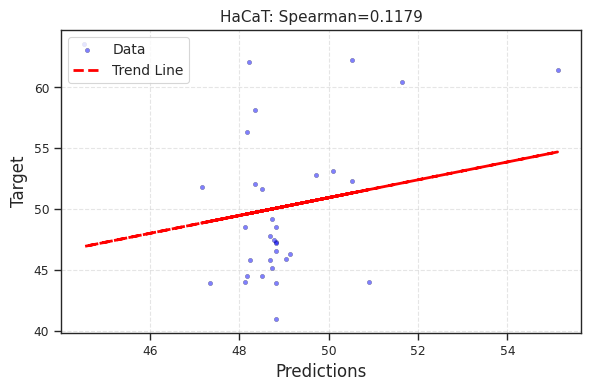

In [11]:


from src.Trainer_seq_struct_general import Trainer_Seq_Struct_general
from src.loss_functions import loss_manager

#import ipdb; ipdb.set_trace()

#Trainer3 = Trainer_Seq_Struct2(avgtm_mode='global')

from src.Neural_Architectures_general import *


#model_tmp = Encoder_Manager(name='Encoder_LA_MLP_Rank_N_Contrast', dim_embedding= 1280, device= device)
model_tmp = Encoder_Manager(name=config['model_config']['type'], dim_embedding= 1280, device= device)


#optimizers = tmp.set_optimizer()
print('Done')
loss_handler = loss_manager(
    loss=config['loss']['type'],#'rank_n_contrast_loss_representation',
    device=device,    
)
#loss='MSE_loss',

print(f'checkpoint pointer to .....{checkpoint_pathESM}')
ESM_only_experiment = Trainer_Seq_Struct_general(
    model_tmp,
    checkpoint_pathESM,
    path_progresESM,
    config['initial_paths']['output_metrics_ESM_only'],
    train_embedding_esm2,
    val_embedding_esm2,
    loss_handler,
    device
)

#import ipdb; ipdb.set_trace()

# Training the model or Loading pretrained models in case of existing
model_to_test = ESM_only_experiment.setup_training()
 

# Testing model
#import ipdb; ipdb.set_trace()
Trainer_Seq_Struct_general.test_model(model_to_test, test_embedding_esm2, device, 
                               f"{config['initial_paths']['output_metrics_ESM_only']}.txt")

#import ipdb; ipdb.set_trace()
del model_tmp
del model_to_test
del loss_handler
del ESM_only_experiment

### For Inverse Folding PiFold Using Prediction by Component (convolutions as a way of pooling + sum pooling to get the final predictions)

Done
checkpoint pointer to .....{'main_path': '../checkpoints/experiments_10_05_2024/PiFold_only/global/AllMeltome_balanceMSE/', 'pred_suffixe': 'pred'}
Loading global model....




testing data: : 0it [00:00, ?it/s]

MSE: tensor(45.1755, device='cuda:0')
RMSE: tensor(6.7213, device='cuda:0')
MAE: tensor(4.7603, device='cuda:0')
Spearman Corr: tensor(0.2216, device='cuda:0')


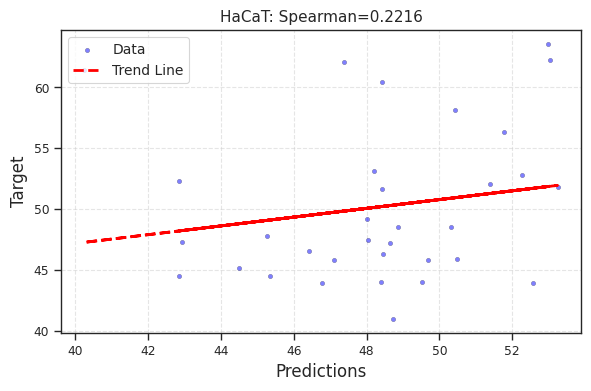

In [12]:
from src.Trainer_seq_struct_general import Trainer_Seq_Struct_general
from src.loss_functions import loss_manager

#import ipdb; ipdb.set_trace()

#Trainer3 = Trainer_Seq_Struct2(avgtm_mode='global')

from src.Neural_Architectures_general import *

#import ipdb; ipdb.set_trace()
#model_tmp = Encoder_Manager(name='Encoder_LA_MLP_Rank_N_Contrast', dim_embedding= 1280, device= device)
model_tmp = Encoder_Manager(name=config['model_config']['type'], dim_embedding= 128, device= device)


#optimizers = tmp.set_optimizer()
print('Done')
loss_handler = loss_manager(
    loss=config['loss']['type'],#'rank_n_contrast_loss_representation',
    device=device,    
)
#loss='MSE_loss',
print(f'checkpoint pointer to .....{checkpoint_pathPiFold}')

PiFold_only_experiment = Trainer_Seq_Struct_general(
    model_tmp,
    checkpoint_pathPiFold,
    path_progresPiFold,
    config['initial_paths']['output_metrics_PiFold_only'],
    train_embedding_PiFold,
    val_embedding_PiFold,
    loss_handler,
    device
)

# Training the model or Loading pretrained models in case of existing
model_to_test = PiFold_only_experiment.setup_training()
 

# Testing model
#import ipdb; ipdb.set_trace()
Trainer_Seq_Struct_general.test_model(model_to_test, test_embedding_PiFold, device, 
                               f"{config['initial_paths']['output_metrics_PiFold_only']}.txt")


del model_tmp
del model_to_test
del loss_handler
del PiFold_only_experiment


### For Both ESM2 and Inverse Folding PiFold Contributions Together Using Prediction by Component (convolutions as a way of pooling + sum pooling to get the final predictions)

Done
checkpoint pointer to .....{'main_path': '../checkpoints/experiments_10_05_2024/Mix/global/AllMeltome_balanceMSE/', 'pred_suffixe': 'pred'}
Loading global model....




testing data: : 0it [00:00, ?it/s]

MSE: tensor(55.3317, device='cuda:0')
RMSE: tensor(7.4385, device='cuda:0')
MAE: tensor(5.8553, device='cuda:0')
Spearman Corr: tensor(-0.2289, device='cuda:0')


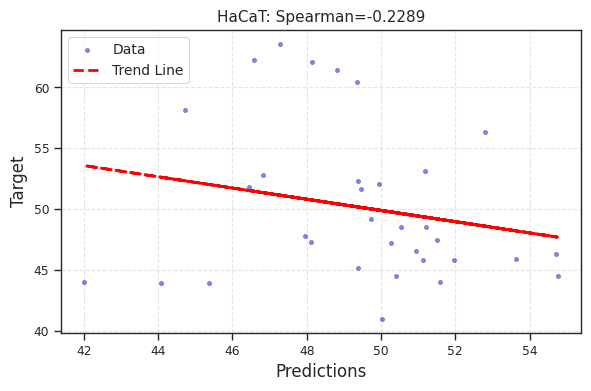

In [13]:
from src.Trainer_seq_struct_general import Trainer_Seq_Struct_general
from src.loss_functions import loss_manager

#import ipdb; ipdb.set_trace()

#Trainer3 = Trainer_Seq_Struct2(avgtm_mode='global')

from src.Neural_Architectures_general import *


#model_tmp = Encoder_Manager(name='Encoder_LA_MLP_Rank_N_Contrast', dim_embedding= 1280, device= device)
model_tmp = Encoder_Manager(name=config['model_config']['type'], dim_embedding= 1280 + 128, device= device)


#optimizers = tmp.set_optimizer()
print('Done')
loss_handler = loss_manager(
    loss=config['loss']['type'],#'rank_n_contrast_loss_representation',
    device=device,    
)
#loss='MSE_loss',
print(f'checkpoint pointer to .....{checkpoint_pathMix}')

Merge_experiment = Trainer_Seq_Struct_general(
    model_tmp,
    checkpoint_pathMix,
    path_progresMix,
    config['initial_paths']['output_metrics_Both'],
    train_embedding_merged,
    val_embedding_merged,
    loss_handler,
    device
)

# Training the model or Loading pretrained models in case of existing
model_to_test = Merge_experiment.setup_training()
 

# Testing model
#import ipdb; ipdb.set_trace()
Trainer_Seq_Struct_general.test_model(model_to_test, test_embedding_merged, device, 
                               f"{config['initial_paths']['output_metrics_Both']}.txt")



del model_tmp
del model_to_test
del loss_handler
del Merge_experiment 
